# Genrify Project - Phase II
## Music genre prediction

Henri Toussaint<br>
Victor Saint Guilhem<br>
Benoît Lafon<br>

The project sets out to predict the genre of a music using the Spotify API, which provides audio features for each tracks. To collect the tracks, we used a recommandation function with a genre seed. We handpicked 20 genres in order to best represent tracks, and from each genre, we collected 100 tracks.

# Data Loading Using Pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("music_collection.csv")
data = data.iloc[np.random.permutation(len(data))]
pd_attributes = data.loc[:,'acousticness':'valence']
attributes = np.array(pd_attributes)

print('Number of instances: ' + str(data.shape[0]))
print('Number of attributes: ' + str(pd_attributes.shape[1]))
print('Attributes:')
for i in pd_attributes.columns.values:
    print('\t'+str(i))

Number of instances: 2000
Number of attributes: 13
Attributes:
	acousticness
	danceability
	duration_ms
	energy
	instrumentalness
	key
	liveness
	loudness
	mode
	speechiness
	tempo
	time_signature
	valence


In [3]:
data.head()

,artist,track,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre
263,Wolfgang Amadeus Mozart,"Serenade In G Major: Eine Kleine Nachtmusik, K...",0.723000,0.390,468133,0.0432,0.000303,6,0.108,-24.344,1,0.0506,147.436,4,0.3400,classical
695,Téléphone,Ca c'est vraiment toi - Remasterisé En 2006,0.040200,0.594,268841,0.9310,0.000007,9,0.178,-2.852,1,0.0636,139.429,4,0.8430,french
1412,The Clash,White Riot,0.000609,0.169,116440,0.9740,0.774000,2,0.295,-4.863,1,0.0649,205.278,4,0.5940,punk-rock
1478,All Time Low,A Love Like War,0.000248,0.462,213747,0.9870,0.000002,5,0.311,-3.501,0,0.1200,161.988,4,0.6130,punk-rock
204,Erik Satie,Gnossienne: No. 2,0.995000,0.337,100267,0.0295,0.934000,2,0.111,-26.308,0,0.0503,69.188,5,0.0386,classical


# Target variable

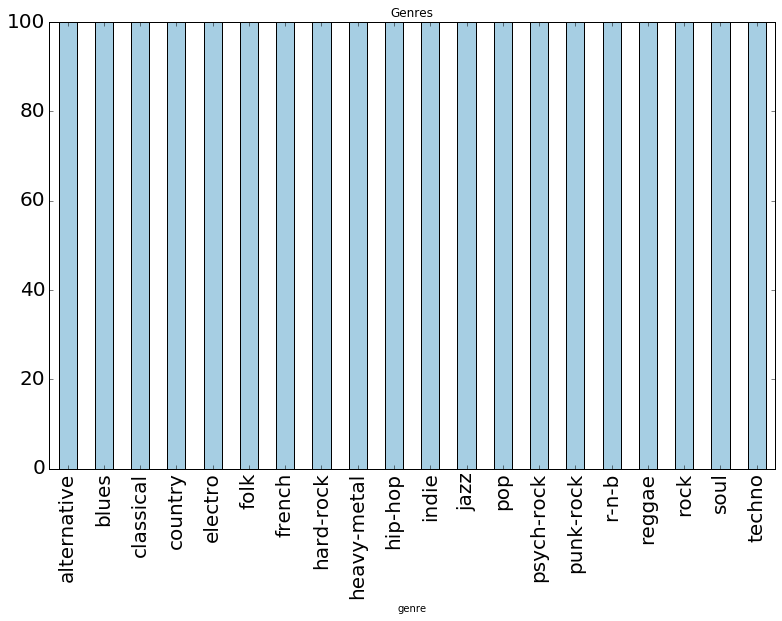

In [4]:
#plt.figure('Genres')
%matplotlib inline
#data['genre'].astype("category")
count_genre = data.groupby("genre").size()
count_genre.plot(kind='bar',title='Genres',figsize=[13,8], colormap='Paired',fontsize=20)


# Target Variable vectorized

In [5]:
pd_target_vect = pd.get_dummies(data['genre'])
pd_target_vect.head()

,alternative,blues,classical,country,electro,folk,french,hard-rock,heavy-metal,hip-hop,indie,jazz,pop,psych-rock,punk-rock,r-n-b,reggae,rock,soul,techno
263,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
695,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
204,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
target_vect = np.array(pd_target_vect)
print('Dimension: ' + str(target_vect.shape))
print(repr(target_vect))

#Multinomial Target Variable
GENRES = ['alternative','blues','classical','country','electro','folk','french','hard-rock','heavy-metal','hip-hop','indie','jazz','pop','psych-rock','punk-rock','r-n-b','reggae','rock','soul','techno']
target_multinomial = []
for i in data['genre']:
    target_multinomial.append(GENRES.index(i))
target_multinomial=np.array(target_multinomial)

Dimension: (2000, 20)
array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])


# Scaled data

In [7]:
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

sc_attributes = scale(attributes)
#print(repr(sc_attributes))

x_train, x_test, y_train, y_test = train_test_split(sc_attributes, target_multinomial, train_size=0.67, random_state=1)

# Plot Confusion Matrix

In [8]:
#SOURCE: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (13,12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, 3)
    #    print("Normalized confusion matrix")
    else:
        pass
    #    print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Learing curve

In [9]:
#SOURCE : http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Logistic Regression

[0.32250000000000001, 0.35999999999999999, 0.371, 0.373, 0.37150000000000005, 0.372]
['loudness', 'acousticness', 'instrumentalness', 'loudness', 'loudness', 'acousticness', 'acousticness', 'energy', 'energy', 'danceability', 'instrumentalness', 'acousticness', 'loudness', 'instrumentalness', 'energy', 'loudness', 'speechiness', 'loudness', 'valence', 'danceability']


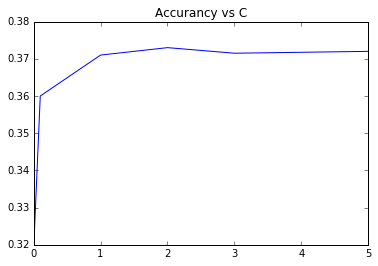

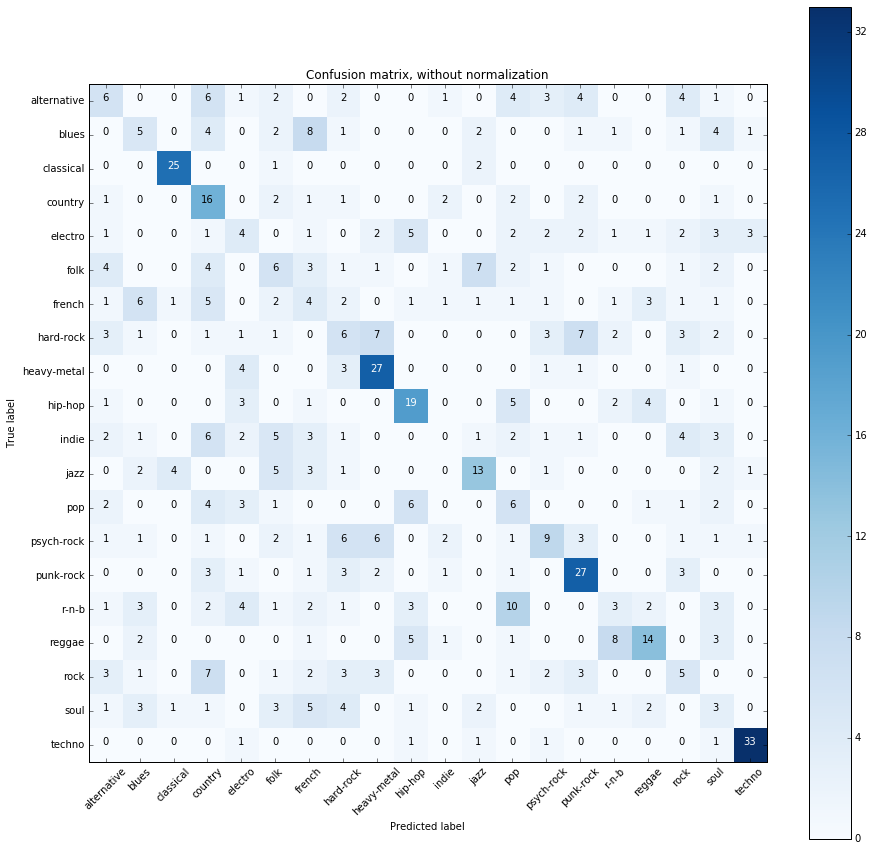

In [10]:
from sklearn.linear_model import LogisticRegression

lr_models =[]
Cs = [0.01,0.1,1,2,3,5]
for c in Cs:
    lr_models.append(LogisticRegression(C=c, multi_class='multinomial', solver='newton-cg'))

acc_scores_c=[]
for model in lr_models:
    acc_scores = cross_val_score(model, sc_attributes, target_multinomial,cv=5)
    acc_scores_c.append(np.mean(acc_scores))

plt.plot(Cs,acc_scores_c)
plt.title('Accurancy vs C')
print(acc_scores_c)

lr_fitted = lr_models[4].fit(x_train,y_train) #model for C=3
#print(lr_fitted.coef_)   #array(nb_classes=20, nb_features=13)
indices_max_coef = np.argmax(lr_fitted.coef_, axis=1)
#print(indices_max_coef)
best_attribute_class = []     #Attribute that contributes the most to a given class based on the weight value 
for i in indices_max_coef:
    best_attribute_class.append(pd_attributes.columns.values[i])
print(best_attribute_class)

y_pred_lr = lr_fitted.predict(x_test)

cnf_lr = confusion_matrix(y_test, y_pred_lr)

plot_confusion_matrix(cnf_lr, classes=GENRES,
                      title='Confusion matrix, without normalization')
#plot_confusion_matrix(cnf_lr, classes=GENRES, normalize=True, title='Normalized confusion matrix')

#plot_learning_curve(tree_model, "Decision Tree - LEARNING CURVE", sc_attributes, target_multinomial, cv=5, n_jobs=4)


# Decision Tree

Averaged Decision Tree Accuracy: 0.2805


<module 'matplotlib.pyplot' from '/home/benoit/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

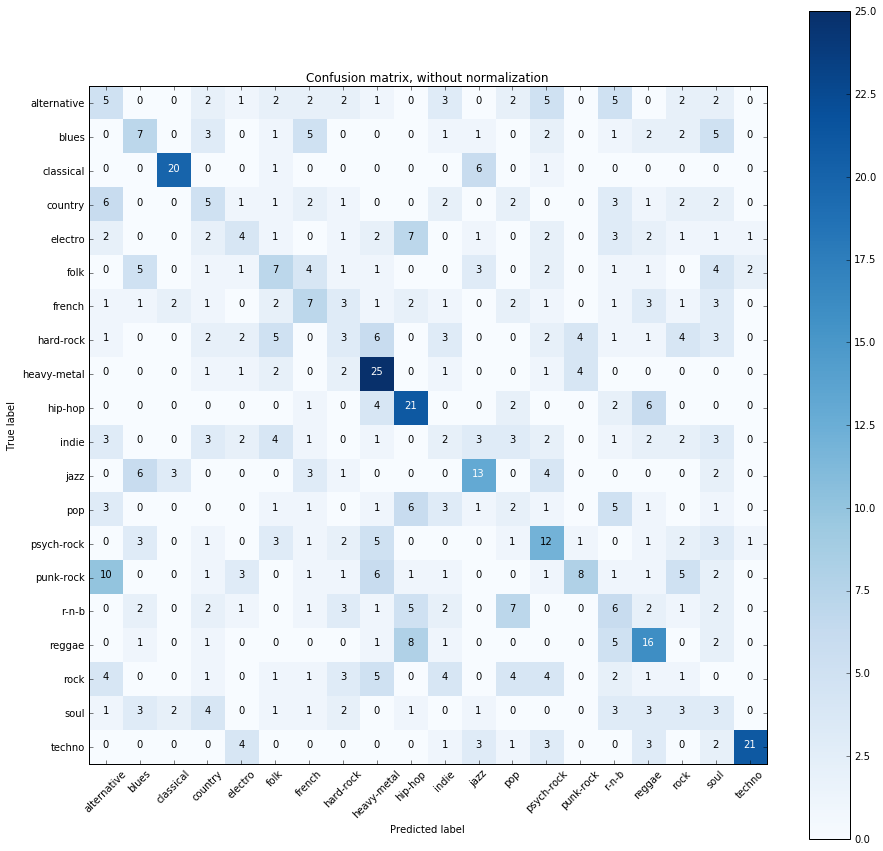

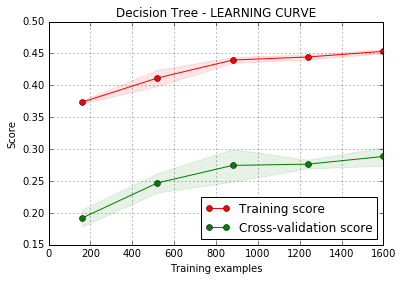

In [20]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=15)

tree_acc_scores = cross_val_score(tree_model, sc_attributes, target_multinomial,cv=10)
avg_tree_acc = np.mean(tree_acc_scores)
print("Averaged Decision Tree Accuracy: " + str(avg_tree_acc))

tree_fitted = tree_model.fit(x_train, y_train)

y_pred_tree = tree_fitted.predict(x_test)

cnf_tree = confusion_matrix(y_test, y_pred_tree)

plot_confusion_matrix(cnf_tree, classes=GENRES,
                      title='Confusion matrix, without normalization')

plot_learning_curve(tree_model, "Decision Tree - LEARNING CURVE", sc_attributes, target_multinomial, cv=5, n_jobs=4)


# Naïve Bayes

Averaged Naïve Bayes Accuracy: 0.306


<module 'matplotlib.pyplot' from '/home/benoit/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

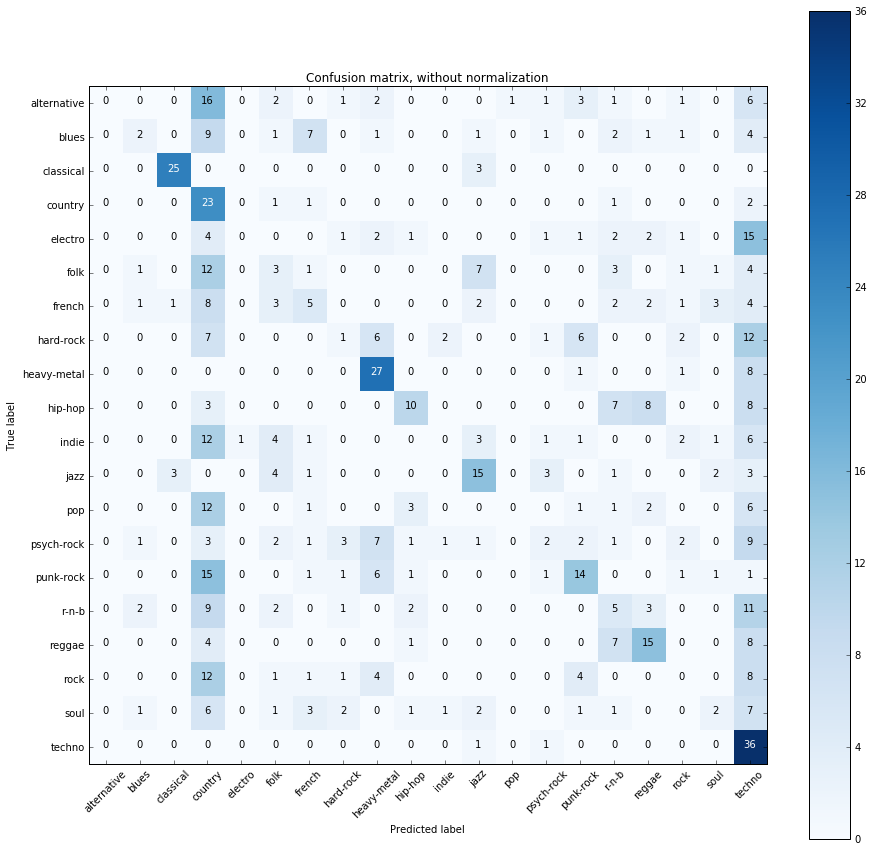

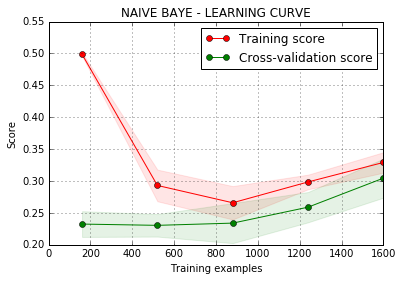

In [19]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()
NB_acc_scores = cross_val_score(NB_model, sc_attributes, target_multinomial,cv=10)

avg_NB_acc = np.mean(NB_acc_scores)
print("Averaged Naïve Bayes Accuracy: " + str(avg_NB_acc))

NB_fitted = NB_model.fit(x_train, y_train)

y_pred_NB = NB_fitted.predict(x_test)

cnf_NB = confusion_matrix(y_test, y_pred_NB)

plot_confusion_matrix(cnf_NB, classes=GENRES,
                      title='Confusion matrix, without normalization')

#train_sizes, train_scores, valid_scores = learning_curve(
#            GaussianNB(), sc_attributes, target_multinomial, train_sizes=[50, 80, 110], cv=5)
plot_learning_curve(NB_model, "NAIVE BAYE - LEARNING CURVE", sc_attributes, target_multinomial, cv=5, n_jobs=4)



# Neural Networks

Averaged Neural Networks Accuracy: 0.3645


<module 'matplotlib.pyplot' from '/home/benoit/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

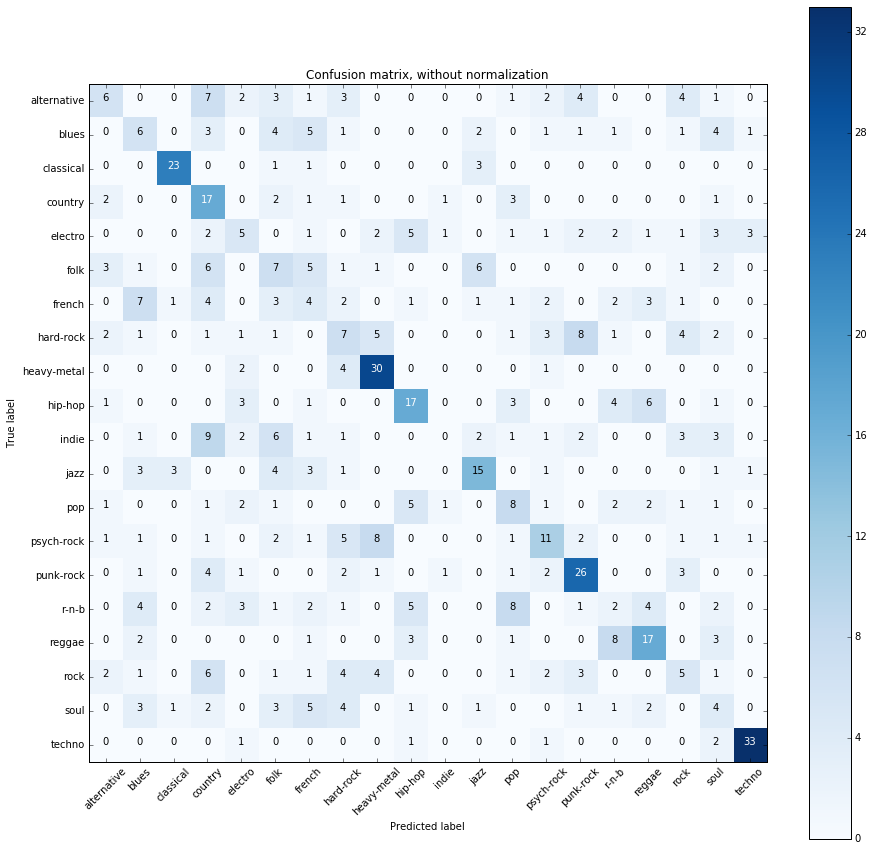

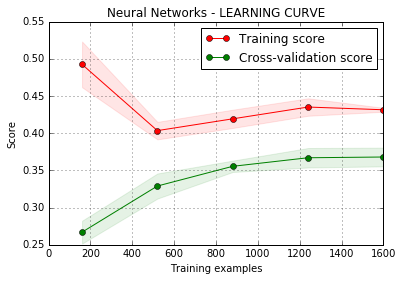

In [33]:
from sklearn.neural_network import MLPClassifier

NN_model = MLPClassifier(hidden_layer_sizes=(200,),alpha=10,activation='tanh', solver='lbfgs')
NN_acc_scores = cross_val_score(NN_model, sc_attributes, target_multinomial,cv=10)

avg_NN_acc = np.mean(NN_acc_scores)
print("Averaged Neural Networks Accuracy: " + str(avg_NN_acc))

NN_fitted = NN_model.fit(x_train, y_train)

y_pred_NN = NN_fitted.predict(x_test)

cnf_NN = confusion_matrix(y_test, y_pred_NN)

plot_confusion_matrix(cnf_NN, classes=GENRES,
                      title='Confusion matrix, without normalization')

#train_sizes, train_scores, valid_scores = learning_curve(
#            GaussianNB(), sc_attributes, target_multinomial, train_sizes=[50, 80, 110], cv=5)
plot_learning_curve(NN_model, "Neural Networks - LEARNING CURVE", sc_attributes, target_multinomial, cv=5, n_jobs=4)

# Random Forest

Averaged Random Forest Accuracy: 0.3645


<module 'matplotlib.pyplot' from '/home/benoit/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

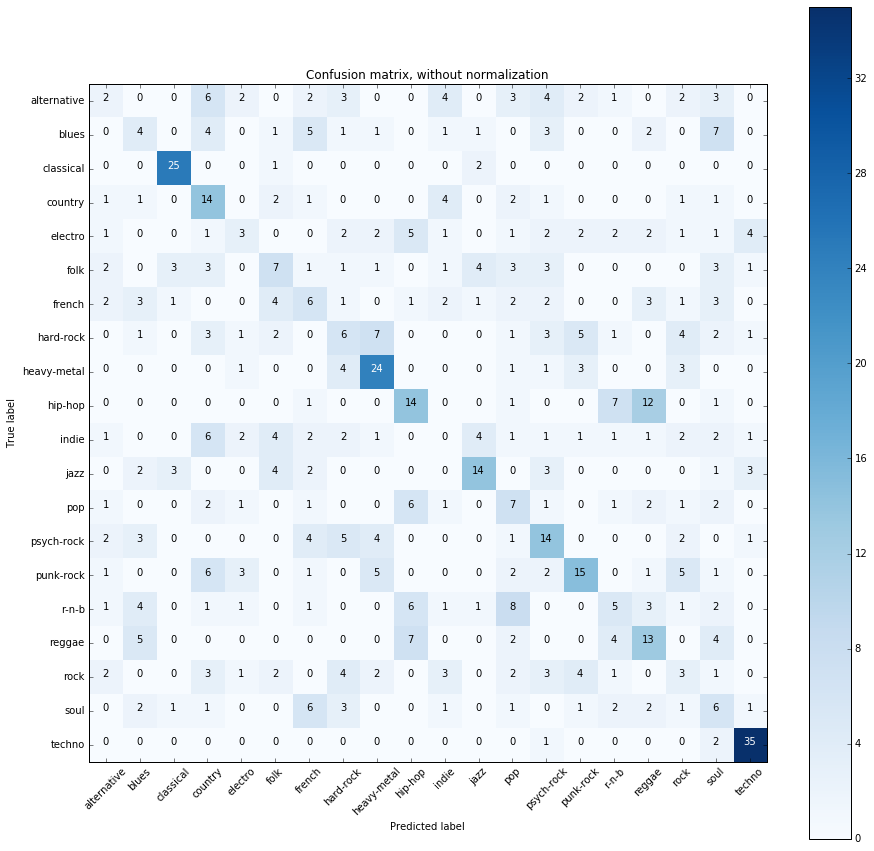

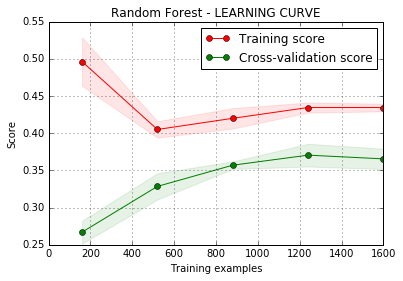

In [36]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(min_samples_split=5, min_samples_leaf=10)
RF_acc_scores = cross_val_score(RF_model, sc_attributes, target_multinomial,cv=10)

avg_RF_acc = np.mean(NN_acc_scores)
print("Averaged Random Forest Accuracy: " + str(avg_RF_acc))

RF_fitted = RF_model.fit(x_train, y_train)

y_pred_RF = RF_fitted.predict(x_test)

cnf_RF = confusion_matrix(y_test, y_pred_RF)

plot_confusion_matrix(cnf_RF, classes=GENRES,
                      title='Confusion matrix, without normalization')

#train_sizes, train_scores, valid_scores = learning_curve(
#            GaussianNB(), sc_attributes, target_multinomial, train_sizes=[50, 80, 110], cv=5)
plot_learning_curve(NN_model, "Random Forest - LEARNING CURVE", sc_attributes, target_multinomial, cv=5, n_jobs=4)